In [26]:
library(eurostat)
library(dplyr)
library(lubridate)
library(ggplot2)
library(DT)
library(tidyr)

## **Loading the dataset**

In [28]:
# Loading Eurostat data for Finland (geo starting with "FI") for 2022
id <- "nama_10r_3empers"
data <- get_eurostat(id)

# Extracting the year from the TIME_PERIOD column
finland_data <- data %>%
  mutate(year = year(TIME_PERIOD)) %>%
  filter(grepl("^FI", geo), nchar(geo) == 5, wstatus=="EMP",  geo != "FIZZZ", year == 2022)

# Display the first few rows of data
head(finland_data)

Dataset query already saved in cache_list.json...

Reading cache file /tmp/Rtmp4kqa40/eurostat/77f2db34982a15adcb37fd75a72a4d7b.rds

Table  nama_10r_3empers  read from cache file:  /tmp/Rtmp4kqa40/eurostat/77f2db34982a15adcb37fd75a72a4d7b.rds



freq,unit,wstatus,nace_r2,geo,TIME_PERIOD,values,year
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>
A,THS,EMP,A,FI196,2022-01-01,4.09,2022
A,THS,EMP,A,FI198,2022-01-01,4.78,2022
A,THS,EMP,A,FI199,2022-01-01,8.58,2022
A,THS,EMP,A,FI19A,2022-01-01,5.71,2022
A,THS,EMP,A,FI19B,2022-01-01,5.65,2022
A,THS,EMP,A,FI1B1,2022-01-01,5.32,2022


In [29]:
str(finland_data)
head(finland_data)
summary(finland_data)

tibble [285 × 8] (S3: tbl_df/tbl/data.frame)
 $ freq       : chr [1:285] "A" "A" "A" "A" ...
 $ unit       : chr [1:285] "THS" "THS" "THS" "THS" ...
 $ wstatus    : chr [1:285] "EMP" "EMP" "EMP" "EMP" ...
 $ nace_r2    : chr [1:285] "A" "A" "A" "A" ...
 $ geo        : chr [1:285] "FI196" "FI198" "FI199" "FI19A" ...
 $ TIME_PERIOD: Date[1:285], format: "2022-01-01" "2022-01-01" ...
 $ values     : num [1:285] 4.09 4.78 8.58 5.71 5.65 5.32 8.46 3.15 2.15 3.02 ...
 $ year       : num [1:285] 2022 2022 2022 2022 2022 ...


freq,unit,wstatus,nace_r2,geo,TIME_PERIOD,values,year
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>
A,THS,EMP,A,FI196,2022-01-01,4.09,2022
A,THS,EMP,A,FI198,2022-01-01,4.78,2022
A,THS,EMP,A,FI199,2022-01-01,8.58,2022
A,THS,EMP,A,FI19A,2022-01-01,5.71,2022
A,THS,EMP,A,FI19B,2022-01-01,5.65,2022
A,THS,EMP,A,FI1B1,2022-01-01,5.32,2022


     freq               unit             wstatus            nace_r2         
 Length:285         Length:285         Length:285         Length:285        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     geo             TIME_PERIOD             values            year     
 Length:285         Min.   :2022-01-01   Min.   :  0.15   Min.   :2022  
 Class :character   1st Qu.:2022-01-01   1st Qu.:  3.15   1st Qu.:2022  
 Mode  :character   Median :2022-01-01   Median :  9.74   Median :2022  
                    Mean   :2022-01-01   Mean   : 27.72   Mean   :2022  
                    3rd Qu.:2022-01-01   3rd Qu.: 24.77   3rd Qu.:2022  
                    Max

In [30]:
View(finland_data)

freq,unit,wstatus,nace_r2,geo,TIME_PERIOD,values,year
<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>
A,THS,EMP,A,FI196,2022-01-01,4.09,2022
A,THS,EMP,A,FI198,2022-01-01,4.78,2022
A,THS,EMP,A,FI199,2022-01-01,8.58,2022
A,THS,EMP,A,FI19A,2022-01-01,5.71,2022
A,THS,EMP,A,FI19B,2022-01-01,5.65,2022
A,THS,EMP,A,FI1B1,2022-01-01,5.32,2022
A,THS,EMP,A,FI1C1,2022-01-01,8.46,2022
A,THS,EMP,A,FI1C2,2022-01-01,3.15,2022
A,THS,EMP,A,FI1C5,2022-01-01,2.15,2022


## **Task 1**

**The dataset finland_data contains information on employment statistics in Finland for the year 2022. Here is a summary of the dataset:**

* **Rows:**  285  entries, each representing employment data for different regions and sectors in Finland.

* **Cols:**
  - *freq:* The time frequency ("A" - Annual).
  - *unit:* The unit of measurement ("THS" stands for thousands).
  - *wstatus:* The work status ("EMP" for employed).
  - *nace_r2:* The NACE Rev. 2 code representing the sector (e.g., "A" for agriculture).
  - *geo:* The geographical region code( consists of 5 charachters "FI***").
  - *TIME_PERIOD:* The time period of the data (fixed to January 1, 2022).
  - *values:* The number of employed persons per 1,000 inhabitants in the given region and sector.
  - *year:* The year of the data (2022 for all entries).

**The dataset includes employment data categorized into four sector groups:**

- *A-F:* Agriculture, Industry, Construction
- *G-J:* Retail, Transport, Accommodation, and Food Services
- *K-N:* ICT, Finance, Insurance, Real Estate
- *O-U:* Public Sector (Government, Education, Health)

#### Aggregating the Data:

In [31]:
unique(finland_data$nace_r2)

[1] "A"     "B-E"   "C"     "F"     "G-I"   "G-J"   "J"     "K"     "K-N"  
[10] "L"     "M_N"   "O-Q"   "O-U"   "R-U"   "TOTAL"

In [32]:
finland_data <- finland_data %>%
  mutate(
    sector_group = case_when(
      nace_r2 %in% c("A", "B-E", "F") ~ "A-F",  # Agriculture, Industry, Construction
      nace_r2 %in% c("G-J") ~ "G-J",  # Retail, Transport, Accommodation, Food
      nace_r2 %in% c( "K-N") ~ "K-N",  # ICT, Financial Services
      nace_r2 %in% c( "O-U") ~ "O-U",  # Public Sector
    )
  ) %>%
  filter(!is.na(sector_group)) 

*The most important statistical measures that best characterize the data:*

In [33]:
print("Number of regions:")
n_distinct(finland_data$geo)

summary_table <- finland_data %>%
  group_by(sector_group) %>%
  summarise(
    mean_employment = mean(values, na.rm = TRUE),
    median_employment = median(values, na.rm = TRUE),
    sd_employment = sd(values, na.rm = TRUE),
    min_employment = min(values, na.rm = TRUE),
    max_employment = max(values, na.rm = TRUE)
  )

datatable(summary_table, options = list(pageLength = 10))


[1] "Number of regions:"


[1] 19

HTML widgets cannot be represented in plain text (need html)

* The **O-U (Public Sector)** has the highest mean employment, followed by G-J (Retail, Transport, Accommodation), which also shows high variation (standard deviation).
* The **K-N (ICT, Finance, Insurance, Real Estate)** sector has the lowest mean employment, indicating lower employment rates in these industries.
* **A-F (Agriculture, Industry, Construction)** and **K-N** both show significant variability in employment across regions, as indicated by their high standard deviations.

In [34]:
options(repr.plot.width=30, repr.plot.height=10)

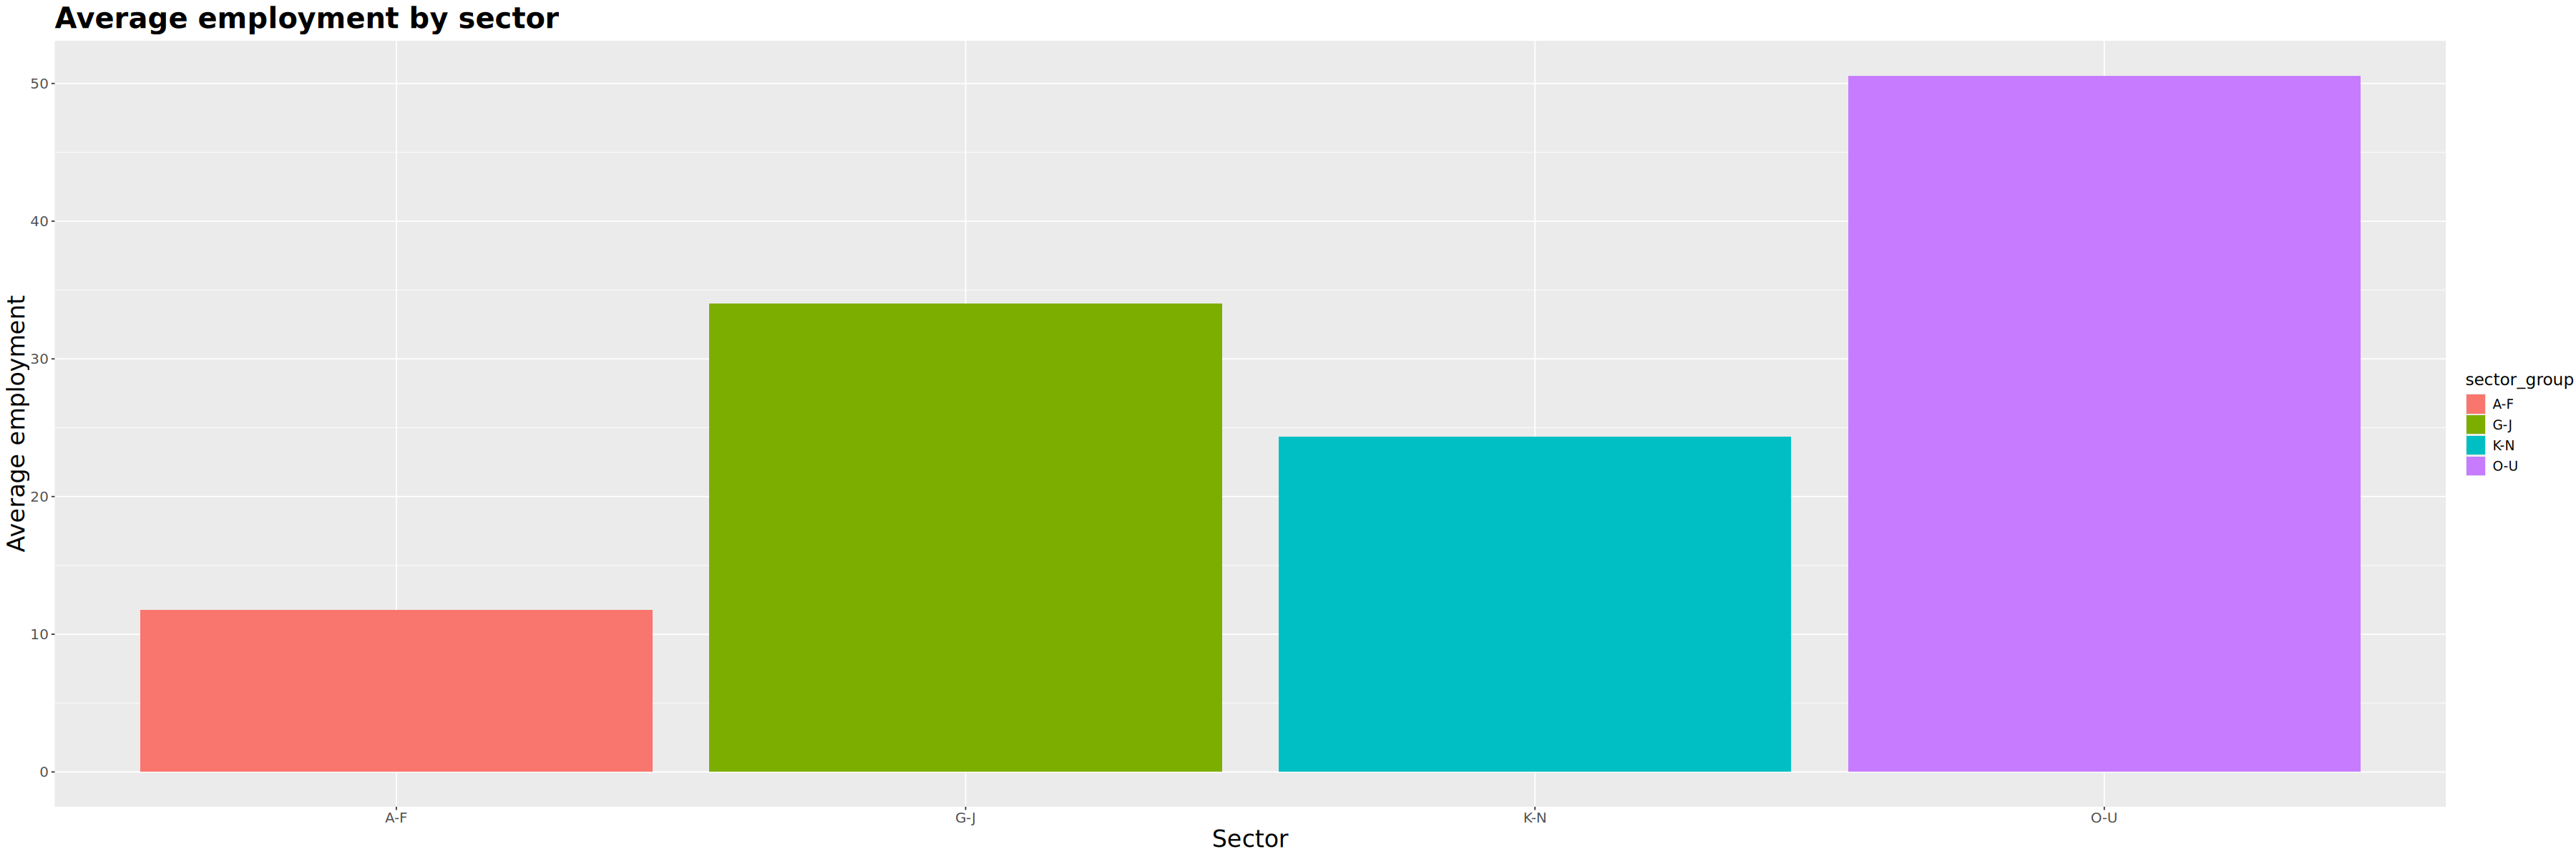

In [35]:
ggplot(summary_table, aes(x = sector_group, y = mean_employment, fill = sector_group)) +
  geom_bar(stat = "identity") +
  labs(title = "Average employment by sector", x = "Sector", y = "Average employment") +
theme(
    text = element_text(size = 14),
    plot.title = element_text(size = 24, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 12)
  )

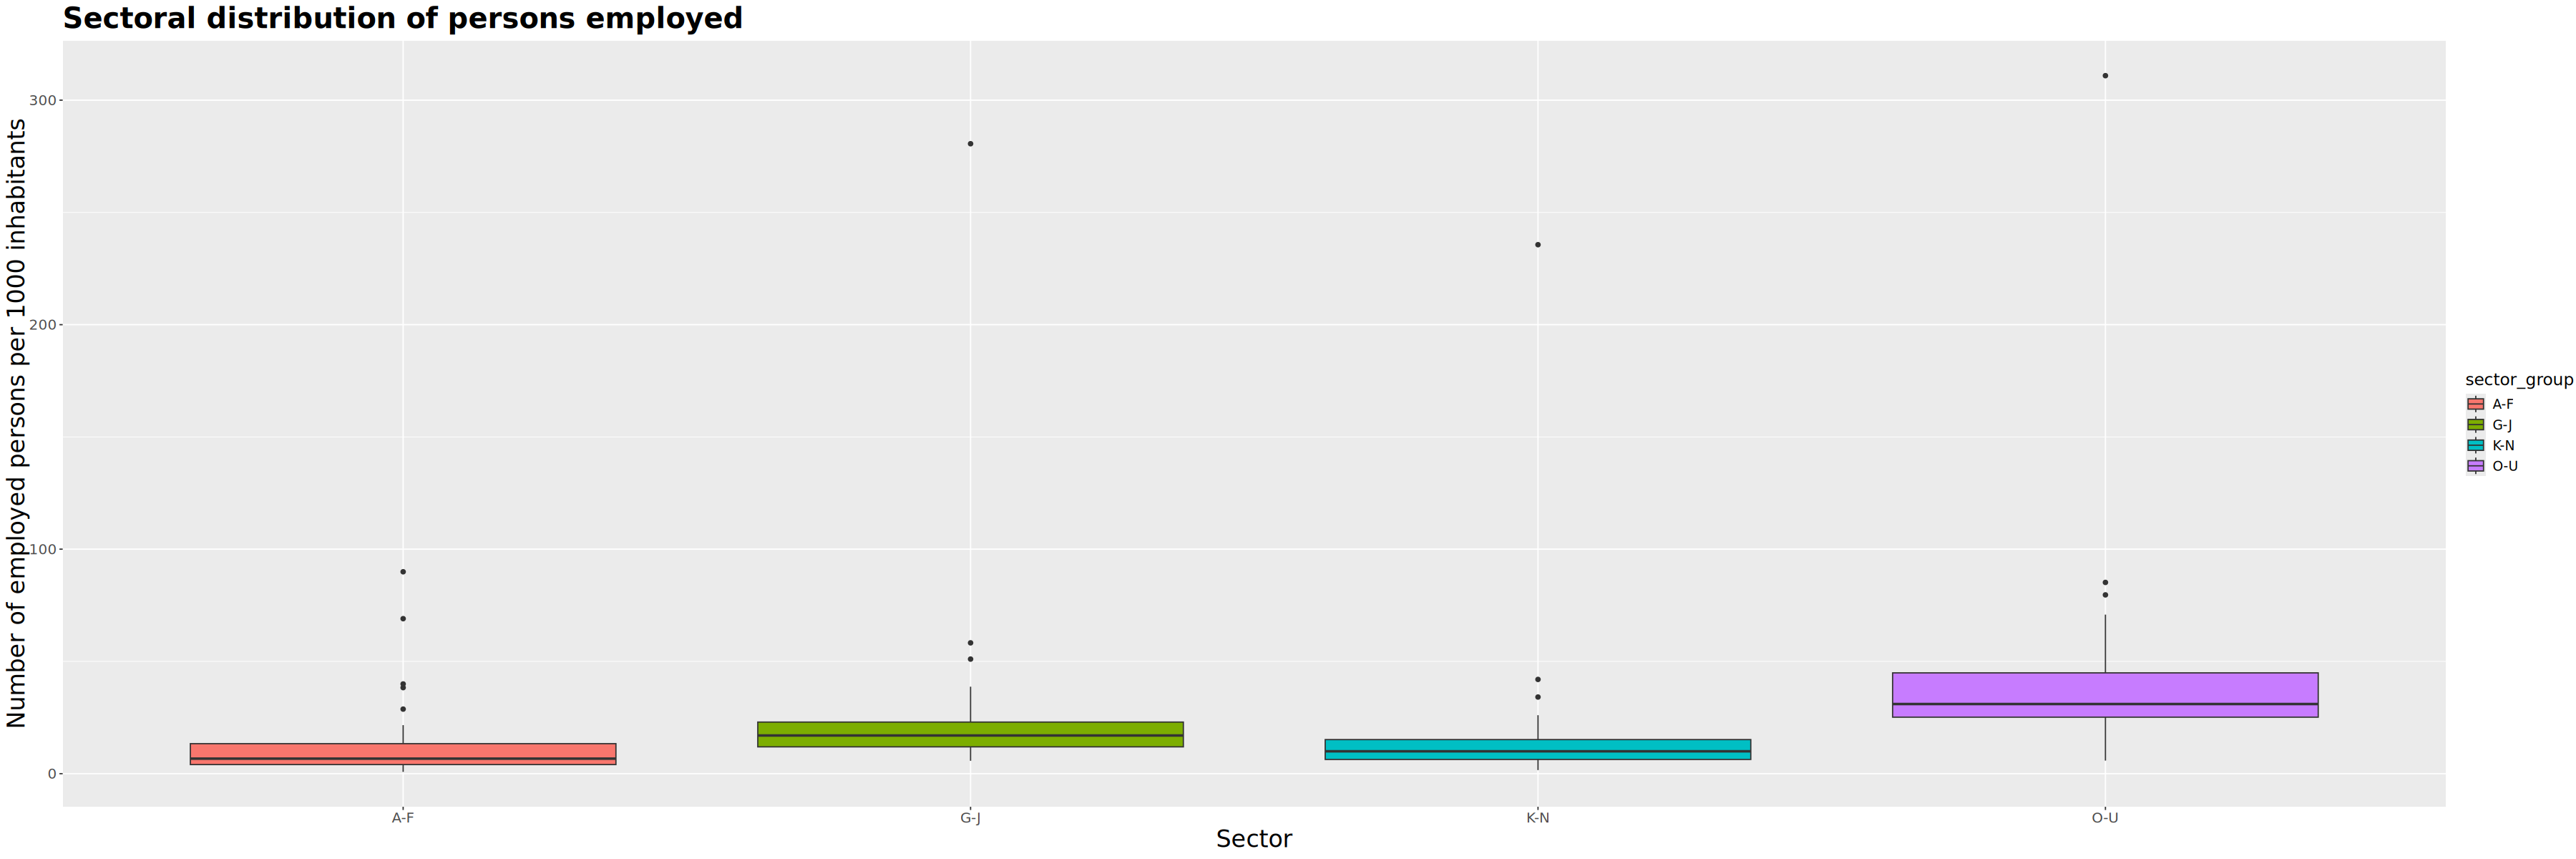

In [36]:
ggplot(finland_data, aes(x = sector_group, y = values, fill = sector_group)) +
  geom_boxplot() +
  labs(
    title = "Sectoral distribution of persons employed",
    x = "Sector",
    y = "Number of employed persons per 1000 inhabitants"
  ) +
theme(
    text = element_text(size = 14),
    plot.title = element_text(size = 24, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 12)
  )

Instead of saying, "Sector A-F has 50,000 employed people", we are measuring employment as:

> *"For every 1000 people in the population, how many are employed in this sector?"*

## **Task 2**

In [37]:
# Create a new contingency table with the combined categories
cont_table <- xtabs(values ~ geo + sector_group, data = finland_data)
addmargins(cont_table)

,A-F,G-J,K-N,O-U,Sum
FI196,33.09,18.84,11.21,37.10,100.24
FI198,31.80,24.35,15.46,46.65,118.26
FI199,32.77,17.41,7.87,31.52,89.57
FI19A,33.22,15.05,9.97,28.64,86.88
FI19B,62.66,58.27,41.98,85.19,248.10
FI1B1,164.29,280.59,235.62,310.91,991.41
FI1C1,64.99,51.04,34.14,79.64,229.81
FI1C2,21.80,15.87,11.25,28.85,77.77
FI1C5,15.29,11.17,6.33,19.95,52.74
FI1C6,26.84,18.89,11.01,29.45,86.19


#### 2.1.Interpretation of the Contingency Table 

This table presents the number of **employed individuals (in thousands)** across different **NUTS-3 regions in Finland (`geo`)** and **economic sector groups (`sector_group`)**.

---

**Row Labels (`geo`):**  
The rows represent different **NUTS-3 regions in Finland**.

Each row contains employment numbers for that specific region across different economic sectors.

**Column Labels (`sector_group`):**  
The columns categorize employment into different **economic sector groups**.

---

**Key Observations:**  
  1. Total Employment in Finland (2022)

The sum of all employment across regions and sectors is 2,741,270 people (~2.74 million), which is realistic.

  2. Largest Employment Region

`FI1B1` has the highest employment with 991.41k (almost 1 million people), likely referring to Helsinki region, which is Finland's most populated and economically active area.

  3. Sector with the Most Employment, the difference between sectors

Public Sector (O-U) has the highest total employment with 960.82k people (~960,820). This includes education, healthcare, and government services.

Industry & Construction (A-F) and Retail & Transport (G-J) are also significant, with 671.02k and 646.51k employees, respectively.

ICT & Financial Services (K-N) has the lowest employment with 462.92k, but this is expected since these industries are specialized and don't employ as many people.

  4. Regional Disparities

`FI200` (possibly Åland) has the lowest employment with only 17.8k total employees, which is expected due to its small population.

`FI1D5`, `FI1D8`, and `FI200` are among the least employed regions, with employment below 50k.

  

#### 2.2. Form Hypotheses

  - **Null Hypothesis (H0)**: There is no significant difference in the employment distribution across regions and sectors.
  - **Alternative Hypothesis (H1)**: There is a significant difference in the employment distribution across regions and sectors.

Let's test this with **Chi-Square Test for Independence**

In [38]:
# Firstly let's merge FI200 with FI1DC because FI200 has very small employment numbers

finland_data_merged <- finland_data %>%
  mutate(geo = case_when(
    geo %in% c("FI200", "FI1DC") ~ "FI1DC_FI200",  # Combine small regions
    TRUE ~ geo  # Leave other regions unchanged
  ))

# create a new contingency table
cont_table_merged <- xtabs(values ~ geo + sector_group, data = finland_data_merged)


# Perform the chi-squared test 
test_result <- chisq.test(cont_table_merged)

# Display the result
test_result


	Pearson's Chi-squared test

data:  cont_table_merged
X-squared = 126.16, df = 51, p-value = 2.626e-08


#### Interpretation of the Results

1. **Chi-Square Statistic (X-squared) = 126.16:**
   - The Chi-Square statistic measures the discrepancy between the **observed** and **expected** frequencies. The value (`126.16`) indicates that there are noticeable differences in employment distributions across regions and sectors.

2. **p-value = 2.626e-08:**
   - The **p-value** is extremely small (much smaller than 0.05), meaning the probability of these differences occurring due to random chance is very low. Since the p-value is far below 0.05, we reject the null hypothesis.

---

**Conclusion**

There **is a statistically significant relationship** between **region (`geo`)** and **sector (`sector_group`)** in terms of employment distribution. The distribution of employment in different sectors across Finland's regions is not random and varies significantly across the regions.

### **Task 3**

**3.1.Hypothesis Pair**: Year-to-Year Regional Employment Change
  - **H₀**: There is no significant difference in employment distribution across sectors between 2021 and 2022 for a specific region. (`FI1B1`)
  - **Hₐ**: There is a significant difference in employment distribution across sectors between 2021 and 2022 for a specific region.

Test: **Paired t-test**
This test is appropriate because we want to compare the same variables (sector employment) measured at two different time points (2021 vs 2022).

In [39]:
# The same dataset but for 2021
finland_data_21 <- data %>%
  mutate(year = year(TIME_PERIOD)) %>%
  filter(grepl("^FI", geo), nchar(geo) == 5, wstatus=="EMP",  geo != "FIZZZ", year == 2021)

# Aggregating it
finland_data_21<- finland_data_21 %>%
  mutate(
    sector_group = case_when(
      nace_r2 %in% c("A", "B", "B-E", "C", "D", "E", "F") ~ "A-F",
      nace_r2 %in% c("G", "G-I", "G-J", "H", "I", "J") ~ "G-J",
      nace_r2 %in% c("K", "K-N", "M_N", "L", "M", "N") ~ "K-N",
      nace_r2 %in% c("O", "O-Q", "O-U", "P", "Q", "R", "R-U", "S", "T", "U") ~ "O-U"
    )
  ) %>%
  filter(!is.na(sector_group)) 

In [40]:
# Prepare the data
region_of_interest <- "FI1B1" 

region_2021 <- finland_data_21 %>% 
  filter(geo == region_of_interest) %>% 
  group_by(sector_group) %>% 
  summarize(total_2021 = sum(values, na.rm = TRUE))

region_2022 <- finland_data %>% 
  filter(geo == region_of_interest) %>% 
  group_by(sector_group) %>% 
  summarize(total_2022 = sum(values, na.rm = TRUE))

# Merge the data
region_comparison <- merge(region_2021, region_2022, by = "sector_group")

# Perform paired t-test
t_test_result <- t.test(region_comparison$total_2021, region_comparison$total_2022, paired = TRUE)
t_test_result


	Paired t-test

data:  region_comparison$total_2021 and region_comparison$total_2022
t = 4.3124, df = 3, p-value = 0.02296
alternative hypothesis: true mean difference is not equal to 0
95 percent confidence interval:
  53.07688 352.04312
sample estimates:
mean difference 
         202.56 


**Statistical Significance**
  - Our **p-value** is `0.02296`, which is less than the common significance level of 0.05. This means we reject the null hypothesis that there is no difference in employment between 2021 and 2022 for the region `FI1B1`.

**Direction of Change**
  - The mean difference is 202.56 (thousand people). On average, the employment across sectors in FI1B1 increased by approximately 202.56 thousand people from 2021 to 2022.

**Confidence Interval**
  - The 95% confidence interval for the true mean difference is between 53.08  and 352.04 (thousand people). Since this interval doesn't include zero, it confirms the statistical significance of the result.

**Test Statistic**
  - The t-value measures how much the observed difference deviates from the assumption that there is no change (null hypothesis). A higher absolute t-value suggests a stronger deviation from H₀.

**Practical Interpretation**
There was a statistically significant increase in employment in this region from 2021 to 2022, with an average increase of about 202.56 thouthand people across sectors. This suggests economic growth or recovery in this region, possibly related to post-pandemic recovery if 2021 was affected by COVID-19 restrictions.

**3.2.Hypothesis Pair**: Regional Employment Specialization
  - **H₀**: The proportion of employees in a specific sector (e.g., K-N for ICT/Financial services) is the same across all regions.
  - **Hₐ**: At least one region has a different proportion of employees in this sector compared to others.

**Test**: Chi-Square Goodness of Fit Test
This test compares observed proportions against expected proportions.

In [41]:
# Focus on a specific sector of interest, e.g., K-N (ICT and Financial services)
sector_of_interest <- "K-N"

# Calculate the proportion of employees in this sector for each region
sector_proportions <- finland_data_merged %>%
  group_by(geo) %>%
  summarize(
    sector_employment = sum(values[sector_group == sector_of_interest], na.rm = TRUE),
    total_employment = sum(values, na.rm = TRUE),
    proportion = sector_employment / total_employment
  ) %>%
  filter(total_employment > 5)  # Remove regions with no employment data

# Calculate national average proportion
national_prop <- sum(sector_proportions$sector_employment) / sum(sector_proportions$total_employment)

# Expected counts based on national proportion
sector_proportions$expected <- sector_proportions$total_employment * national_prop

# Add the national proportion as a column to each row for comparison
sector_proportions$national_average <- national_prop

# Perform Chi-Square test
observed <- sector_proportions$sector_employment
expected <- sector_proportions$expected

chi_sq_result <- chisq.test(observed, p = expected/sum(expected))
chi_sq_result


	Chi-squared test for given probabilities

data:  observed
X-squared = 49.517, df = 17, p-value = 5.018e-05


- **Extremely low p-value**: The p-value is less than `5.018e-05`, which is far below the standard significance level of `0.05`. This means we **strongly reject the null hypothesis**.
  
- **High Chi-squared statistic**: `X-squared = 49.517` is a high value, indicating significant differences among regions.
  
- **Degrees of freedom**: `df = 17` This is based on the number of regions minus one, determining the variability of the test statistic. (still we combined two of them earlier)

This result means:

1. There is overwhelming evidence that the proportion of employees in  ICT/Financial services is **NOT the same** across all Finnish regions.

2. The significant differences indicate **strong regional specialization**, with some regions having much higher or lower proportions of workers in this sector than would be expected if employment were distributed evenly.

Let's take a look on the regions that have significantly higher proportions of K-N sector employment than the national average and visualise it:

In [42]:
# Calculate standardized residuals for each region
sector_proportions$std_residual <- (observed - expected) / sqrt(expected * (1 - national_prop))

# Calculate p-values for each region
sector_proportions$p_value <- 2 * (1 - pnorm(abs(sector_proportions$std_residual)))

# Add significance indicators
sector_proportions$significance <- case_when(
  sector_proportions$p_value < 0.001 ~ "***",
  sector_proportions$p_value < 0.01 ~ "**",
  sector_proportions$p_value < 0.05 ~ "*",
  TRUE ~ "ns"
)

# Add a column to indicate over/under-representation
sector_proportions$specialization <- ifelse(sector_proportions$proportion > national_prop, 
                                          "Higher than average", "Lower than average")

# Sort by residual in descending order
significant_regions <- sector_proportions %>%
  arrange(desc(std_residual)) %>%
  select(geo, proportion, national_average, std_residual, p_value, significance, specialization)

# Print the regions with significantly higher proportions (p < 0.05 and positive residual)
higher_than_average <- significant_regions %>%
  filter(p_value < 0.05 & std_residual > 0)

print(higher_than_average)

# A tibble: 1 × 7
  geo   proportion national_average std_residual       p_value significance
  <chr>      <dbl>            <dbl>        <dbl>         <dbl> <chr>       
1 FI1B1      0.238            0.169         5.78 0.00000000740 ***         
# ℹ 1 more variable: specialization <chr>


`FI1B1` (Uusimaa, Helsinki region) has a significantly higher proportion of employment in the ICT/Financial sector (23.8%) compared to the national average (16.9%).

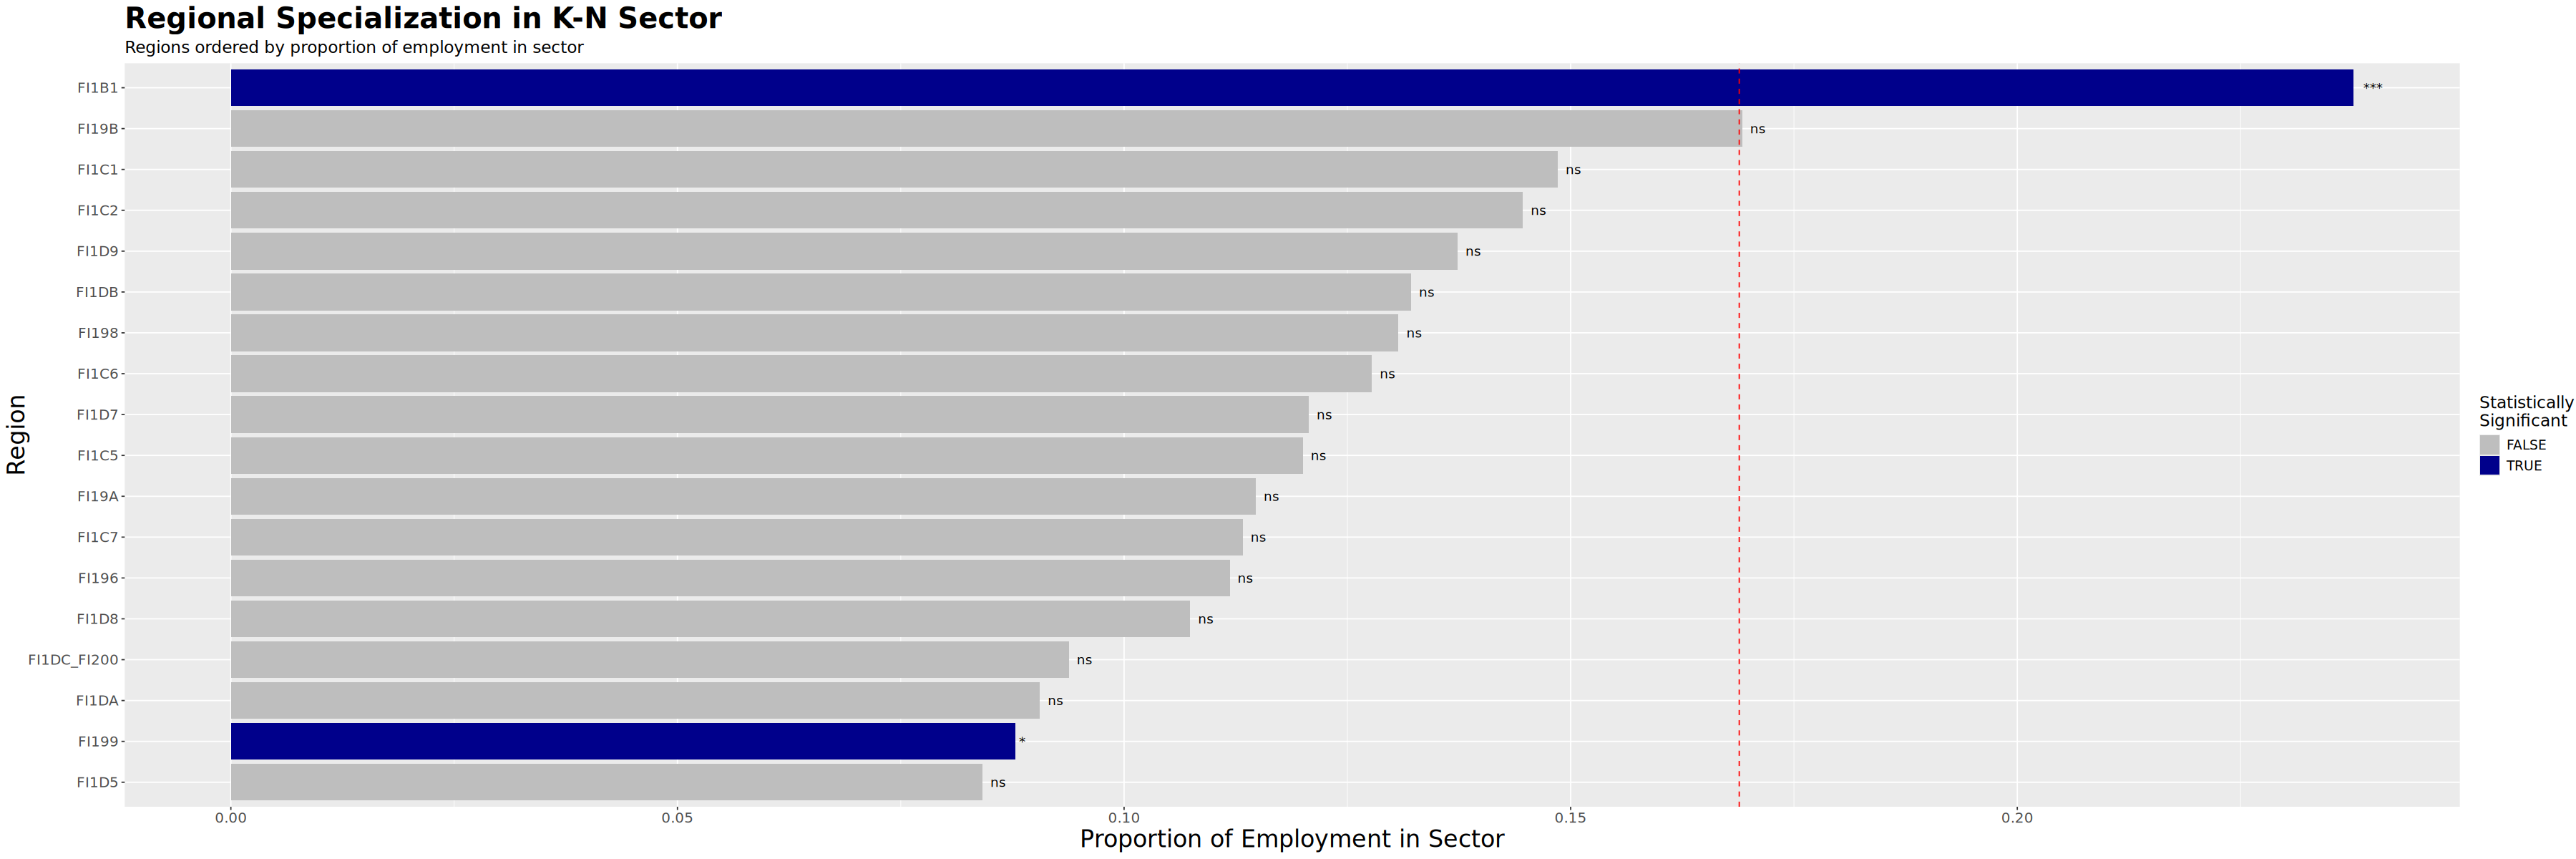

In [43]:
# Create bar plot of proportions with national average line
ggplot(sector_proportions, aes(x = reorder(geo, proportion), y = proportion, fill = p_value < 0.05)) +
  geom_bar(stat = "identity") +
  geom_hline(yintercept = national_prop, linetype = "dashed", color = "red") +
  coord_flip() +
  labs(
    title = paste("Regional Specialization in", sector_of_interest, "Sector"),
    subtitle = "Regions ordered by proportion of employment in sector",
    x = "Region",
    y = "Proportion of Employment in Sector",
    fill = "Statistically\nSignificant"
  ) +
  scale_fill_manual(values = c("grey", "darkblue")) +
  geom_text(aes(label = significance), hjust = -0.5) +
theme(
    text = element_text(size = 14),
    plot.title = element_text(size = 24, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 12)
  )

**3.3.Hypothesis Pair**: Urban vs Rural Employment Differences
  - **H₀**: The employment distribution across economic sectors does not differ significantly between urban and rural regions.
  - **Hₐ**: The employment distribution across economic sectors differs significantly between urban and rural regions.

**Test**: Chi-square test

We can assume that major metropolitan areas like Helsinki (FI1B), Espoo (FI1B1), and Tampere (FI197) are urban.

Rural regions can be identified as those with a lower population density (e.g., Lapland and Eastern Finland regions).


	Pearson's Chi-squared test

data:  contingency_matrix
X-squared = 103.88, df = 3, p-value < 2.2e-16

[1] "Cramer's V: 0.195"
[1] "Observed values:"
         A-F    G-J    K-N    O-U
Rural 506.73 365.92 227.30 649.91
Urban 164.29 280.59 235.62 310.91
[1] "Expected values:"
           A-F      G-J    K-N     O-U
Rural 428.3383 412.6927 295.50 613.329
Urban 242.6817 233.8173 167.42 347.491
[1] "Standardized residuals (values > |1.96| are significant at p < 0.05):"
            A-F       G-J       K-N       O-U
Rural  3.787707 -2.302389 -3.967395  1.477095
Urban -5.032124  3.058818  5.270847 -1.962381


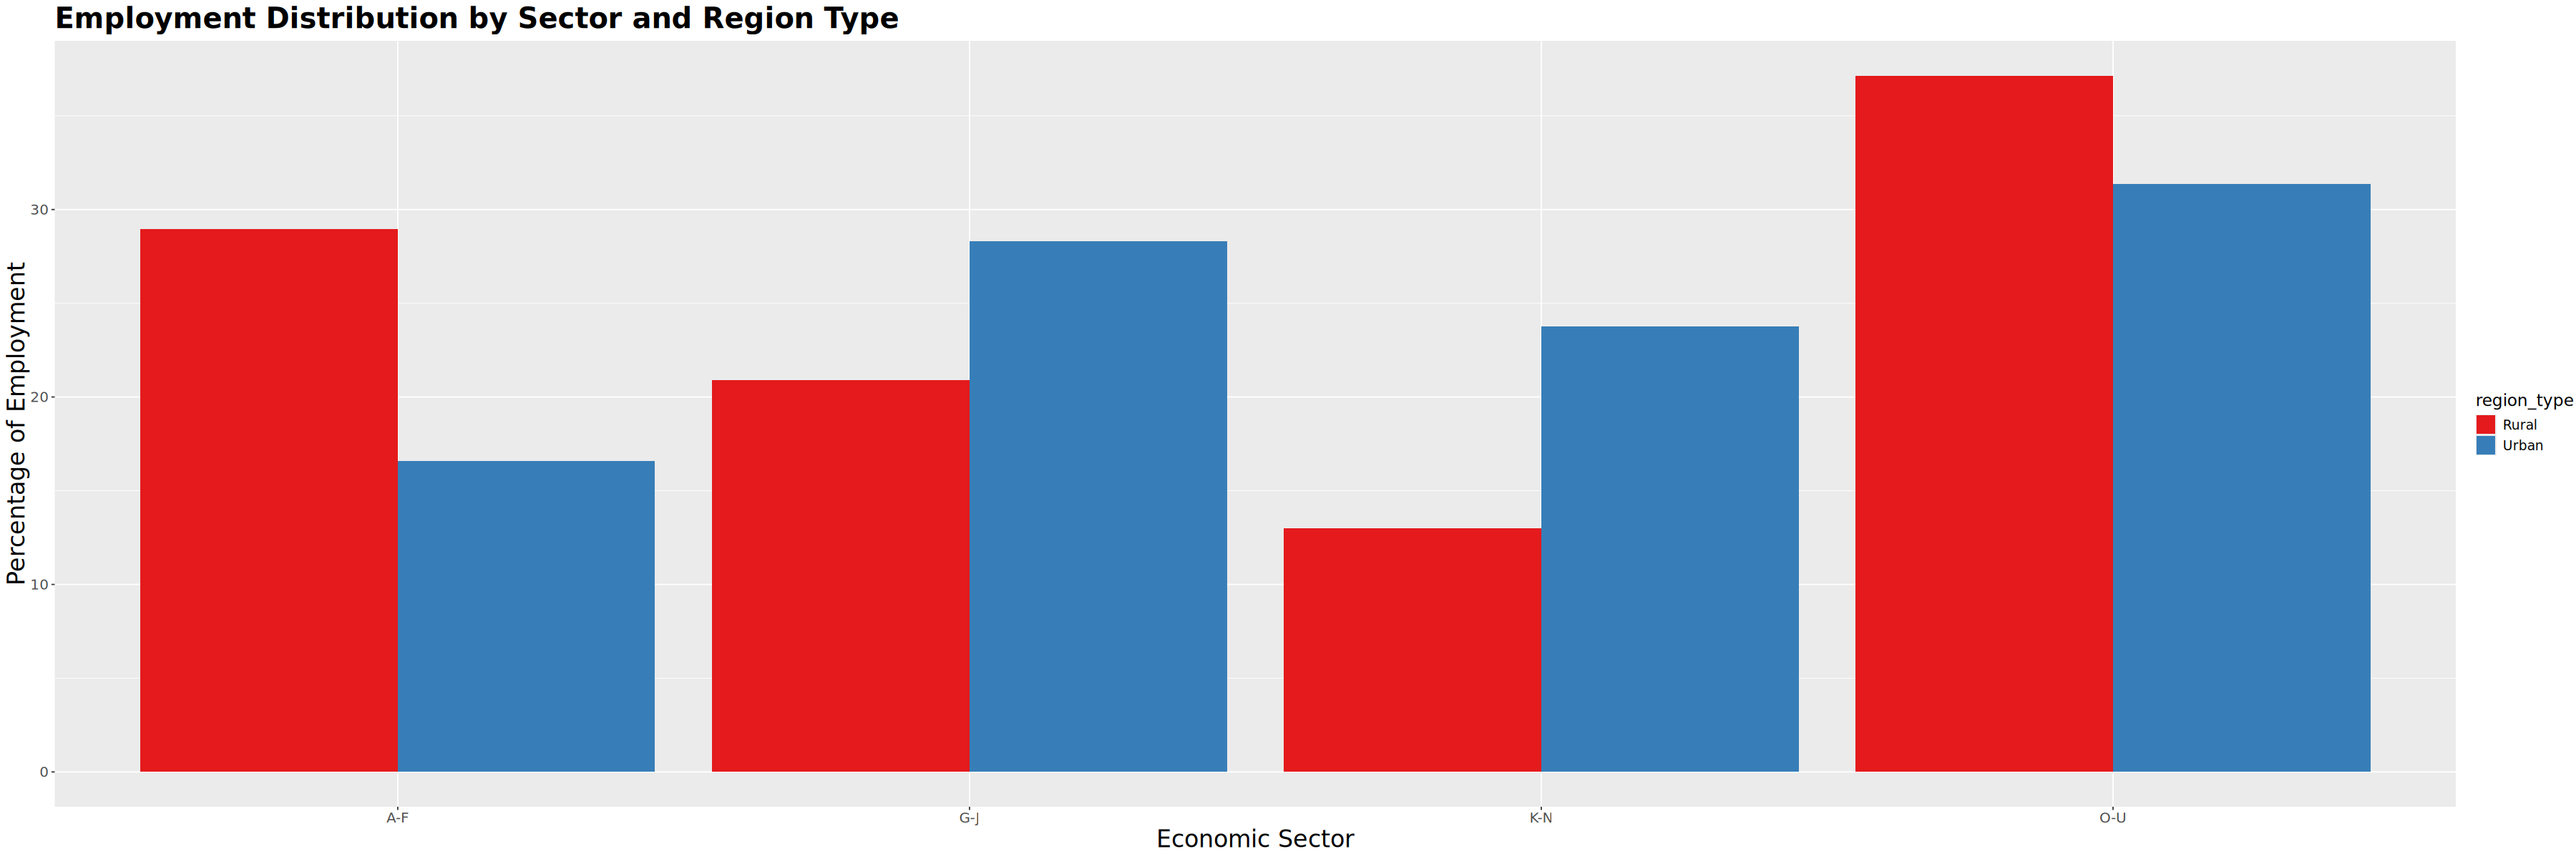

In [44]:
# Define urban and rural regions
urban_regions <- c("FI1B", "FI1B1", "FI197")
finland_data <- finland_data %>%
  mutate(region_type = ifelse(geo %in% urban_regions, "Urban", "Rural"))

# Aggregate employment by region type and sector group
chi_square_data <- finland_data %>%
  group_by(region_type, sector_group) %>%
  summarize(employment = sum(values, na.rm = TRUE), .groups = "drop")

contingency_table <- chi_square_data %>%
  pivot_wider(names_from = sector_group, values_from = employment) 

# Extract the matrix for chi-square test (without the region_type column)
contingency_matrix <- as.matrix(contingency_table[, -1])
rownames(contingency_matrix) <- contingency_table$region_type

# Perform chi-square test
chi_square_result <- chisq.test(contingency_matrix)
print(chi_square_result)

plot_data <- chi_square_data %>%
  group_by(region_type) %>%
  mutate(total = sum(employment),
         percentage = employment/total*100)

ggplot(plot_data, aes(x = sector_group, y = percentage, fill = region_type)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Employment Distribution by Sector and Region Type",
       x = "Economic Sector", 
       y = "Percentage of Employment") +
  scale_fill_brewer(palette = "Set1") +
  theme(
    text = element_text(size = 14),
    plot.title = element_text(size = 24, face = "bold"),
    axis.title = element_text(size = 20),
    axis.text = element_text(size = 12)
  )

# Calculate effect size (Cramer's V)
cramer_v <- sqrt(chi_square_result$statistic / 
                 (sum(contingency_matrix) * (min(nrow(contingency_matrix), ncol(contingency_matrix)) - 1)))
print(paste("Cramer's V:", round(cramer_v, 3)))

# Compare observed vs expected values
print("Observed values:")
print(chi_square_result$observed)
print("Expected values:")
print(chi_square_result$expected)
print("Standardized residuals (values > |1.96| are significant at p < 0.05):")
print(chi_square_result$residuals)

---
> The chi-square test shows a highly significant result **(p-value < 2.2e-16)**, which means we can reject the null hypothesis.
> 
> There is indeed a significant difference in employment distribution across economic sectors between urban and rural regions.

* **A-F** sectors: Significantly overrepresented in rural areas (residual: 3.79) and underrepresented in urban areas (residual: -5.03)
* **G-J** sectors: Significantly underrepresented in rural areas (-2.30) and overrepresented in urban areas (3.06)
* **K-N** sectors: Strongly underrepresented in rural areas (-3.97) and overrepresented in urban areas (5.27)
* **O-U** sectors: The differences are less pronounced, though slightly underrepresented in urban areas (-1.96)